In [21]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import timeit


I have been looking some source for solving this code (plotting part) <br>
https://gist.github.com/AananthV/89fdb34f1b3261f1c109c90197fb86e4 <br>
and also the code from you, professor.

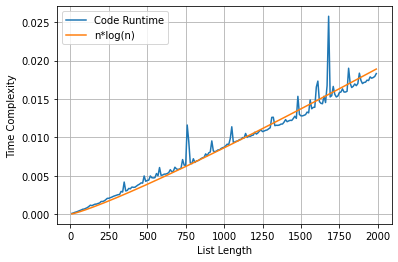

In [39]:
def find_MaximumCrossingSubarray(A, low, mid, high):
  LSum = np.NINF
  s = 0
  maxL = 0
  for i in range(mid, low - 1, -1):
    s = s + A[i]
    if s > LSum:
      LSum = s
      maxL = i

  RSum = np.NINF
  s = 0
  maxR = 0
  for j in range(mid+1, high):
    s = s + A[j]
    if s > RSum:
      RSum = s
      maxR = j
  return (maxL, maxR, LSum + RSum)

def find_MaximumSubarray(A, low, high):
  if high - 1 == low:
    return (low, high, A[low])
  else:
    mid = (low + high) // 2
    LLow, LHigh, LSum = find_MaximumSubarray(A, low, mid)
    RLow, RHigh, RSum = find_MaximumSubarray(A, mid, high)
    CLow, CHigh, CSum = find_MaximumCrossingSubarray(A, low, mid, high)

    if LSum > RSum and LSum > CSum:
      return (LLow, LHigh, LSum)
    elif RSum > LSum and RSum > CSum:
      return (RLow, RHigh, RSum)
    else:
      return (CLow, CHigh, CSum)

plt.xlabel('List Length')
plt.ylabel('Time Complexity')

c = 1/800000
times = []
n = np.array(range(10, 2000, 10))

for i in n:
  a = np.random.randint(-500, 500, size = i)
  times.append(timeit('find_MaximumSubarray(a,  0,  a.shape[0])', number = 1, globals = globals()))

plt.plot(n, times, label = "Code Runtime")
plt.plot(n, c * n * np.log(n), label = "n*log(n)")
plt.grid()
plt.legend()
plt.show()




In [ ]:
arr_test = np.random.randint(-20, 20, size = 10)

print(arr_test,'\n',find_MaximumSubarray(arr_test, 0, arr_test.shape[0]))

[-15  19  12  -2  18   5 -15 -10   9  17] 
 (1, 9, 53)
